## Set Up Dependencies


In [1]:
import seaborn as sns
import pandas as pd
import pecking
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pecking
from teeplot import teeplot as tp

## Data Retrieval and Preprocessing

In [2]:
df = pd.read_parquet("https://osf.io/ah7v5/download")


In [3]:
df["Num Reconstructed Inner Nodes"] = df["num_reconstructed_inner_nodes"]
df["Num True Inner Nodes"] = df["num_true_inner_nodes"]
df["Raw Triplet Distance"] = df["triplet_distance_raw"]
df["Sampled Triplet Distance Strict"] = df["sampled_triplet_distance_strict"]
df["Sampled Triplet Distance Lax"] = df["sampled_triplet_distance_lax"]
df["Annotation Size (bits)"] = df["annotation_size_bits"]
df["Algorithm"] = df["algorithm"]
df["Population Size"] = df["population_size"]
df["Num Generations"] = df["num_generations"]
df["Num Islands"] = df["num_islands"]
df["Num Niches"] = df["num_niches"]
df["Tournament Size"] = df["tournament_size"]
df["Replicate"] = df["replicate"]


In [4]:
df["Inner Node Resolution"] = df["Num Reconstructed Inner Nodes"] / df["Num True Inner Nodes"]
df["Inner Node Loss"] = 1 - df["Inner Node Resolution"]

In [5]:
df["Dynamics"] = "islands" + df["Num Islands"].astype(str) + "-niches" + df["Num Niches"].astype(str) + "-tsize" + df["Tournament Size"].astype(str)

In [6]:
df["Scale"] = "npop" + df["Population Size"].astype(str) + "-ngen" + df["Num Generations"].astype(str)

In [7]:
df["Triplet\nDistance"] = df["Raw Triplet Distance"]
df["Sampled\nTriplet\nDistance\nStrict"] = df["Sampled Triplet Distance Strict"]
df["Sampled\nTriplet\nDistance\nLax"] = df["Sampled Triplet Distance Lax"]
df["Inner\nNode\nResolution"] = df["Inner Node Resolution"]
df["Inner\nNode\nLoss"] = df["Inner Node Loss"]
df["Num\nReconstructed\nInner\nNodes"] = df["Num Reconstructed Inner Nodes"]
df["Num\nTrue\nInner\nNodes"] = df["Num True Inner Nodes"]

In [8]:
df["Scenario"] = df["Dynamics"].map(
    {
        "islands1-niches1-tsize2": "plain",
        "islands1-niches1-tsize1": "drift",
        "islands4-niches2-tsize2": "spatial/ecological mild",
        "islands64-niches8-tsize2": "spatial/ecological strong",
    }
)

In [9]:
dfx = df.melt(
    id_vars=["Algorithm", "Annotation Size (bits)", "Dynamics", "Scenario", "Scale", "Population Size", "Num Generations", "Num Islands", "Num Niches", "Tournament Size", "Replicate"],
    value_vars=["Triplet\nDistance", "Sampled\nTriplet\nDistance\nStrict", "Sampled\nTriplet\nDistance\nLax", "Inner\nNode\nLoss"],
)
dfx.head()


,Algorithm,Annotation Size (bits),Dynamics,Scenario,Scale,Population Size,Num Generations,Num Islands,Num Niches,Tournament Size,Replicate,variable,value
0,col-steady,256,islands4-niches2-tsize2,spatial/ecological mild,npop4096-ngen100000,4096,100000,4,2,2,4,Triplet\nDistance,0.999902
1,col-steady,256,islands4-niches2-tsize2,spatial/ecological mild,npop4096-ngen100000,4096,100000,4,2,2,12,Triplet\nDistance,0.999746
2,col-steady,256,islands4-niches2-tsize2,spatial/ecological mild,npop4096-ngen100000,4096,100000,4,2,2,2,Triplet\nDistance,0.999823
3,col-steady,256,islands4-niches2-tsize2,spatial/ecological mild,npop4096-ngen100000,4096,100000,4,2,2,19,Triplet\nDistance,0.248887
4,col-steady,256,islands4-niches2-tsize2,spatial/ecological mild,npop4096-ngen100000,4096,100000,4,2,2,1,Triplet\nDistance,0.999743


## Visualize Main Metrics

teeplots/a=focal+col=scenario+hue=algorithm+kind=box+post=teed-figure-subplots-adjust-right-0-84+row=scale+sizebits=32+viz=catplot+x=variable+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+kind=box+post=teed-figure-subplots-adjust-right-0-84+row=scale+sizebits=32+viz=catplot+x=variable+y=value+ext=.png


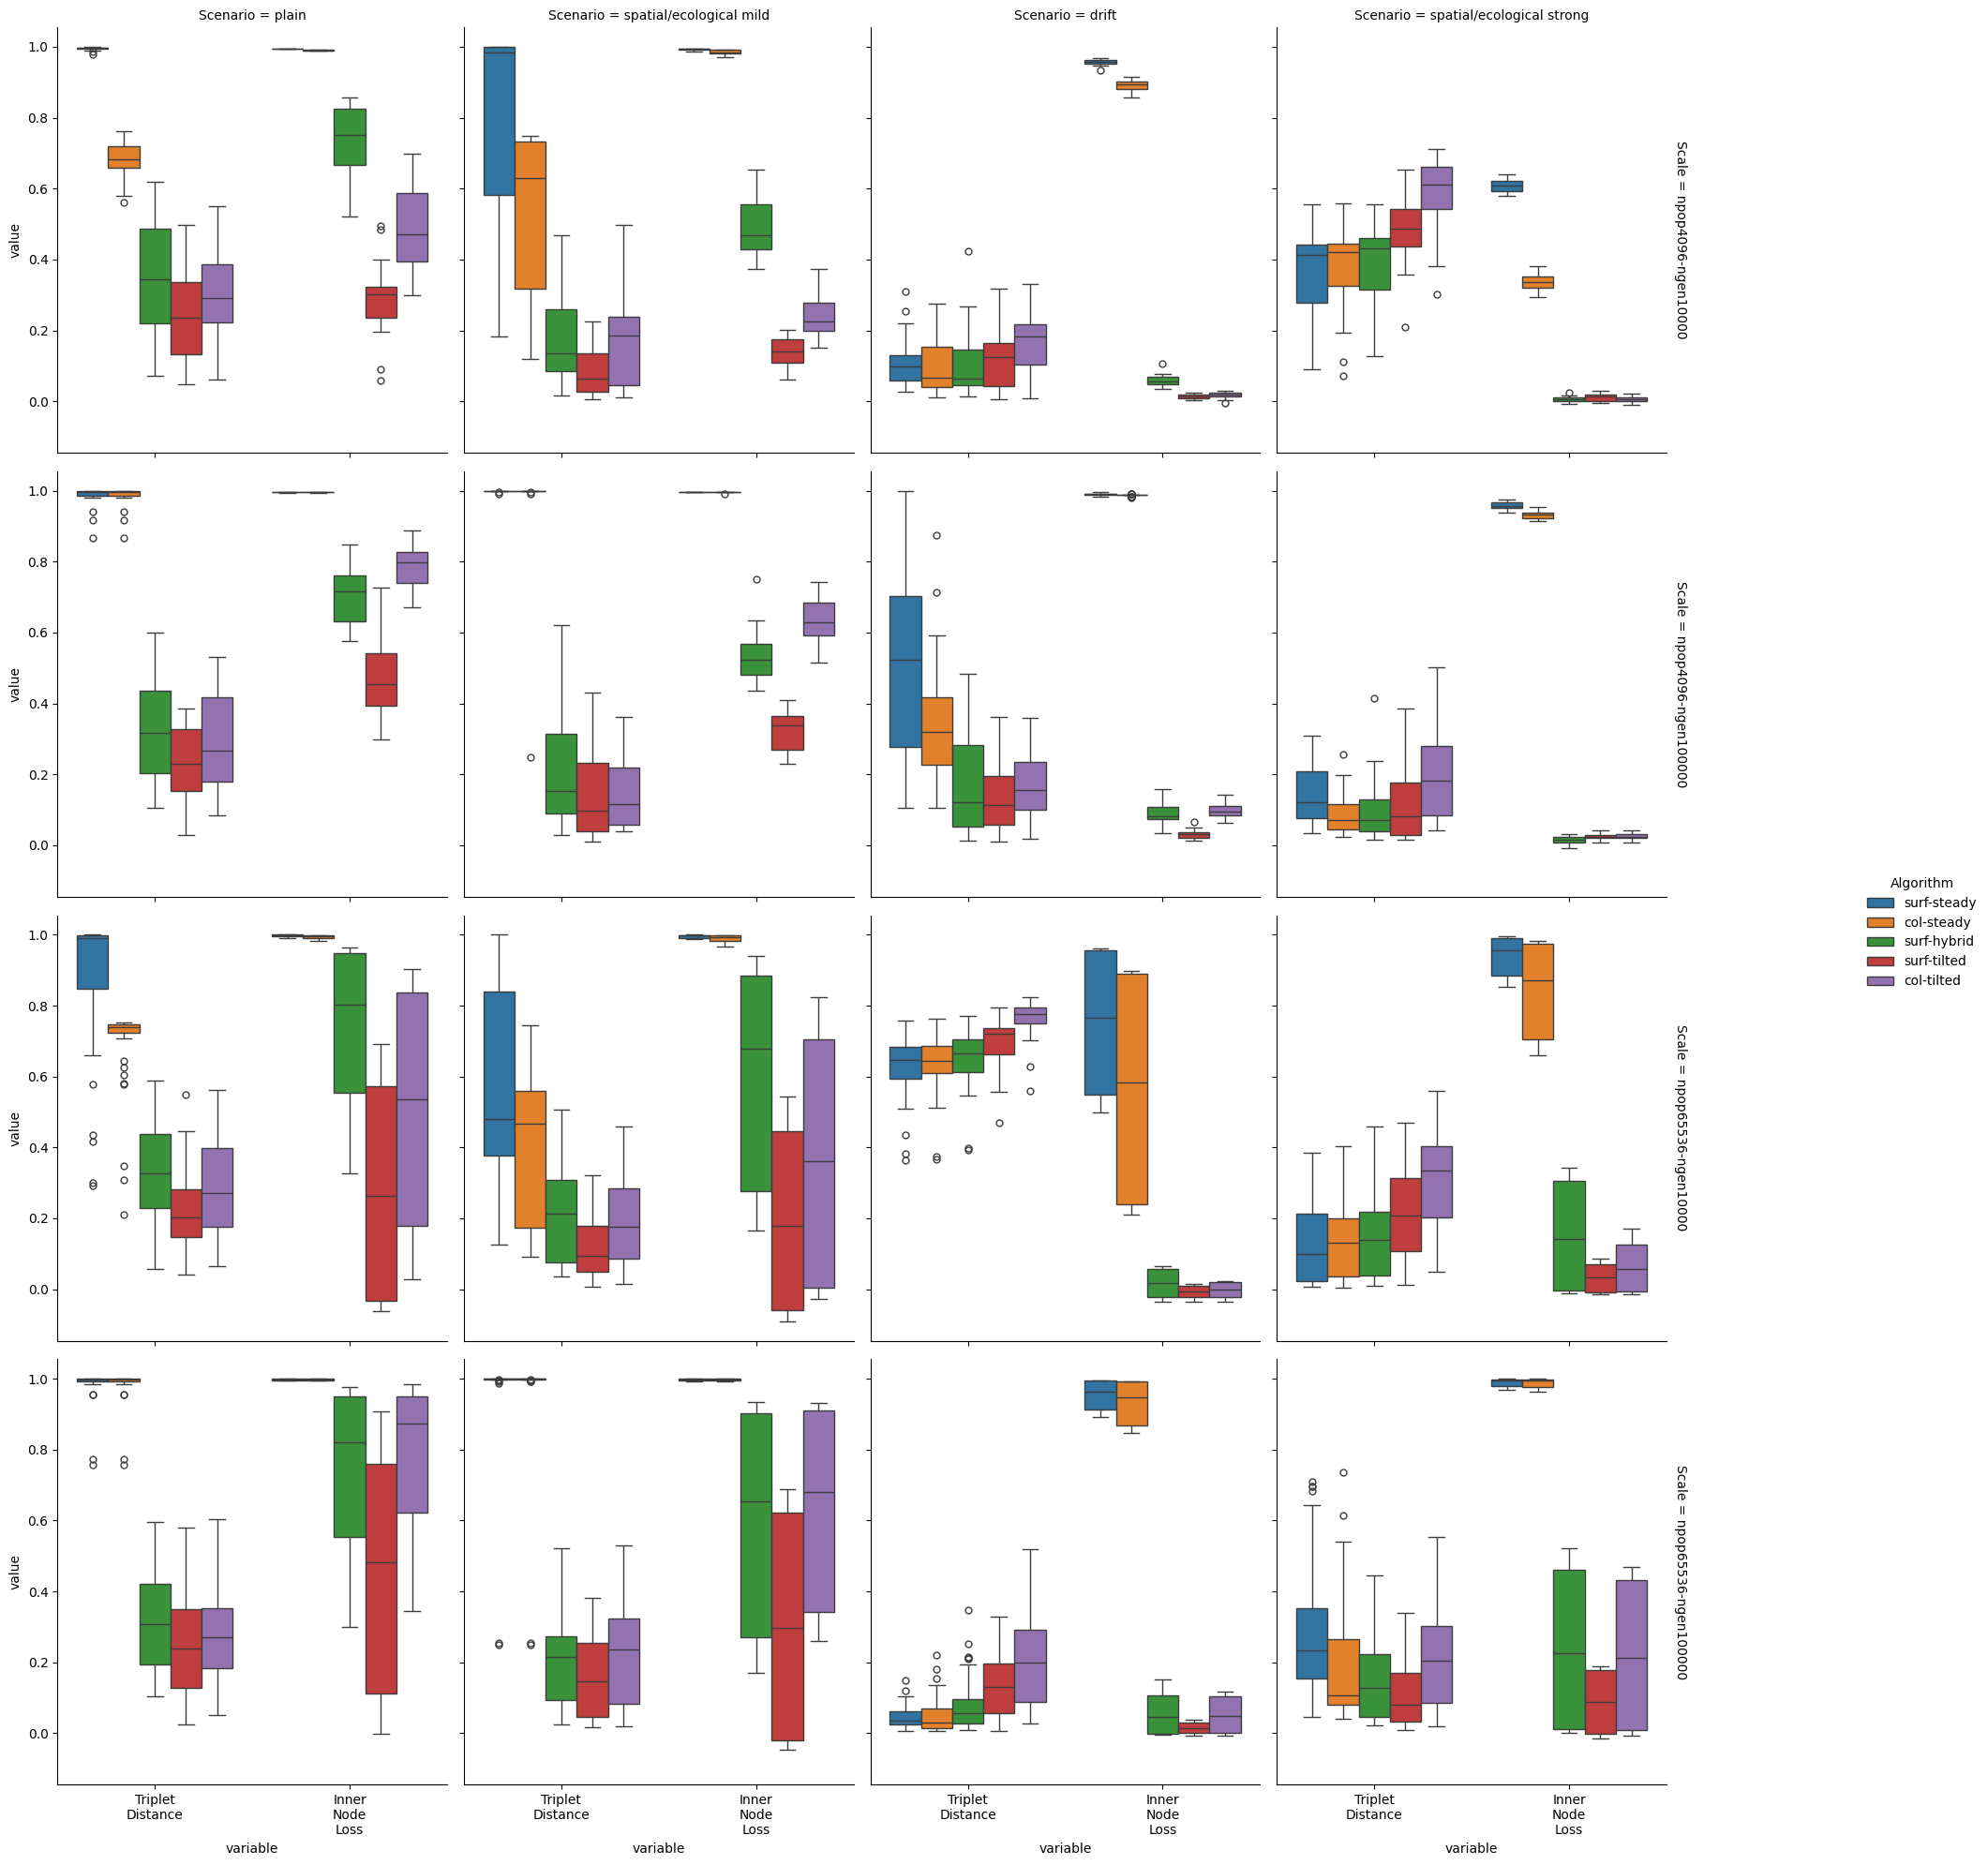

teeplots/a=focal+col=scenario+hue=algorithm+kind=box+post=teed-figure-subplots-adjust-right-0-84+row=scale+sizebits=64+viz=catplot+x=variable+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+kind=box+post=teed-figure-subplots-adjust-right-0-84+row=scale+sizebits=64+viz=catplot+x=variable+y=value+ext=.png


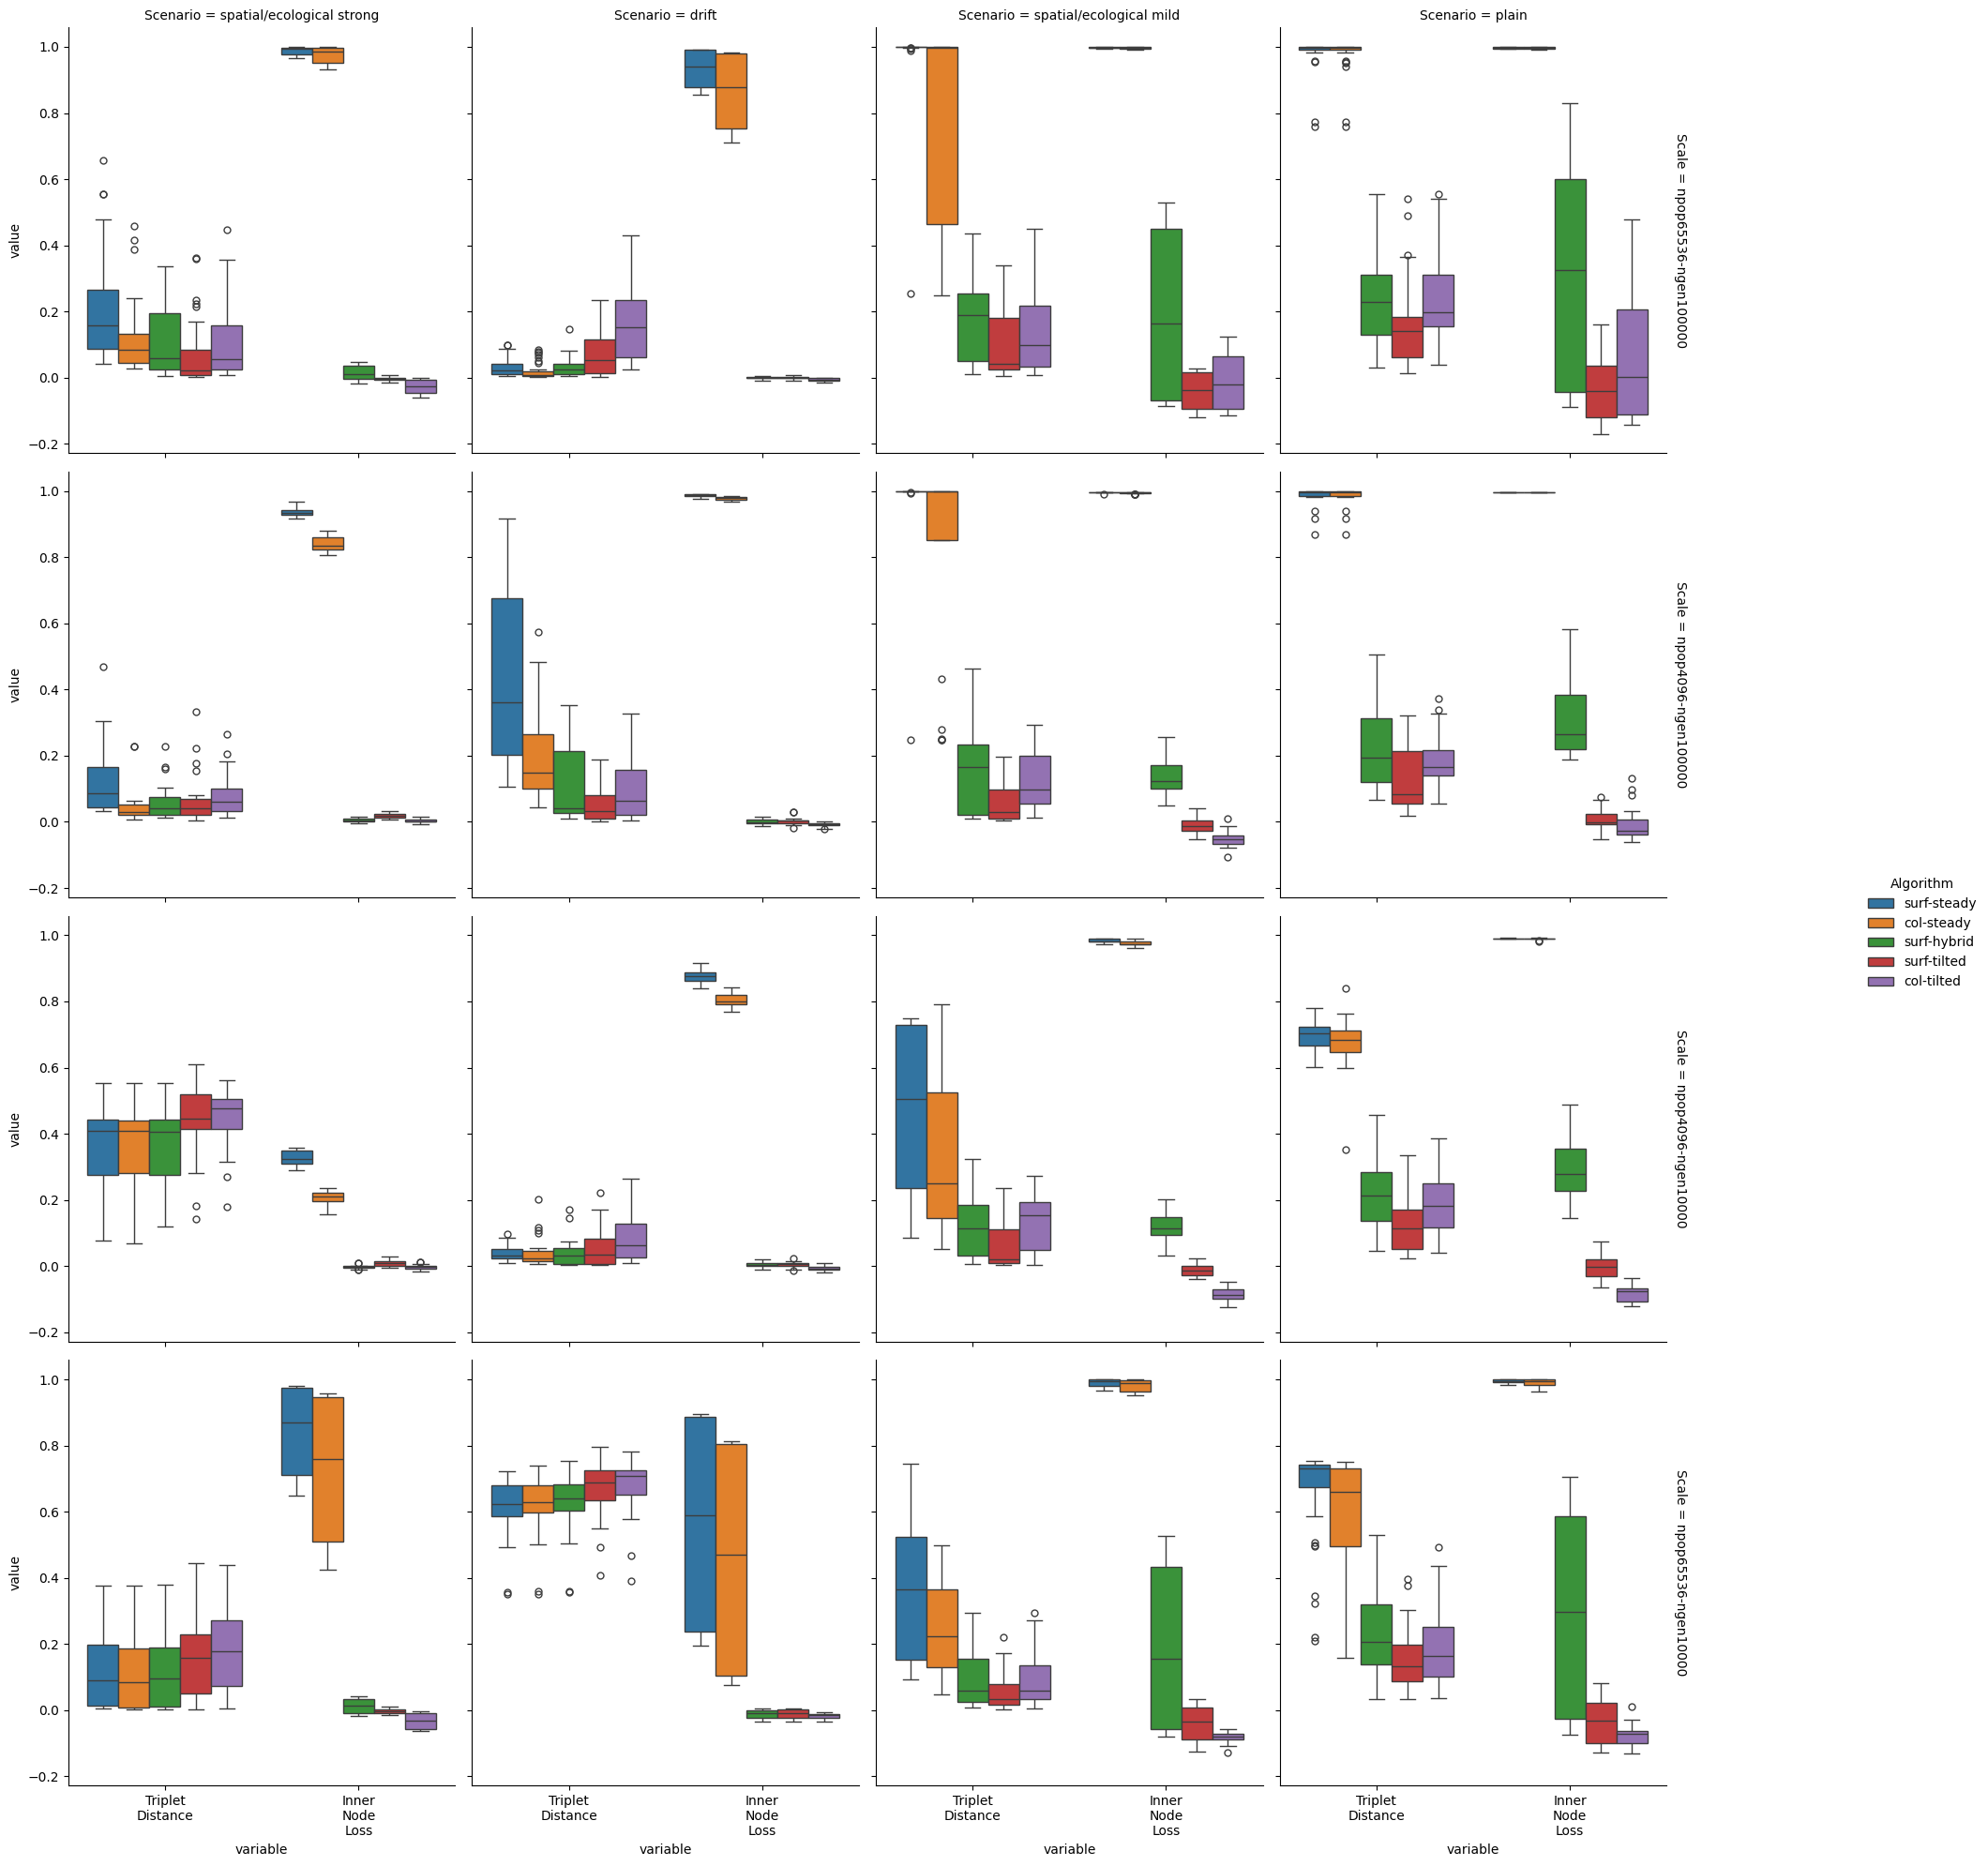

teeplots/a=focal+col=scenario+hue=algorithm+kind=box+post=teed-figure-subplots-adjust-right-0-84+row=scale+sizebits=256+viz=catplot+x=variable+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+kind=box+post=teed-figure-subplots-adjust-right-0-84+row=scale+sizebits=256+viz=catplot+x=variable+y=value+ext=.png


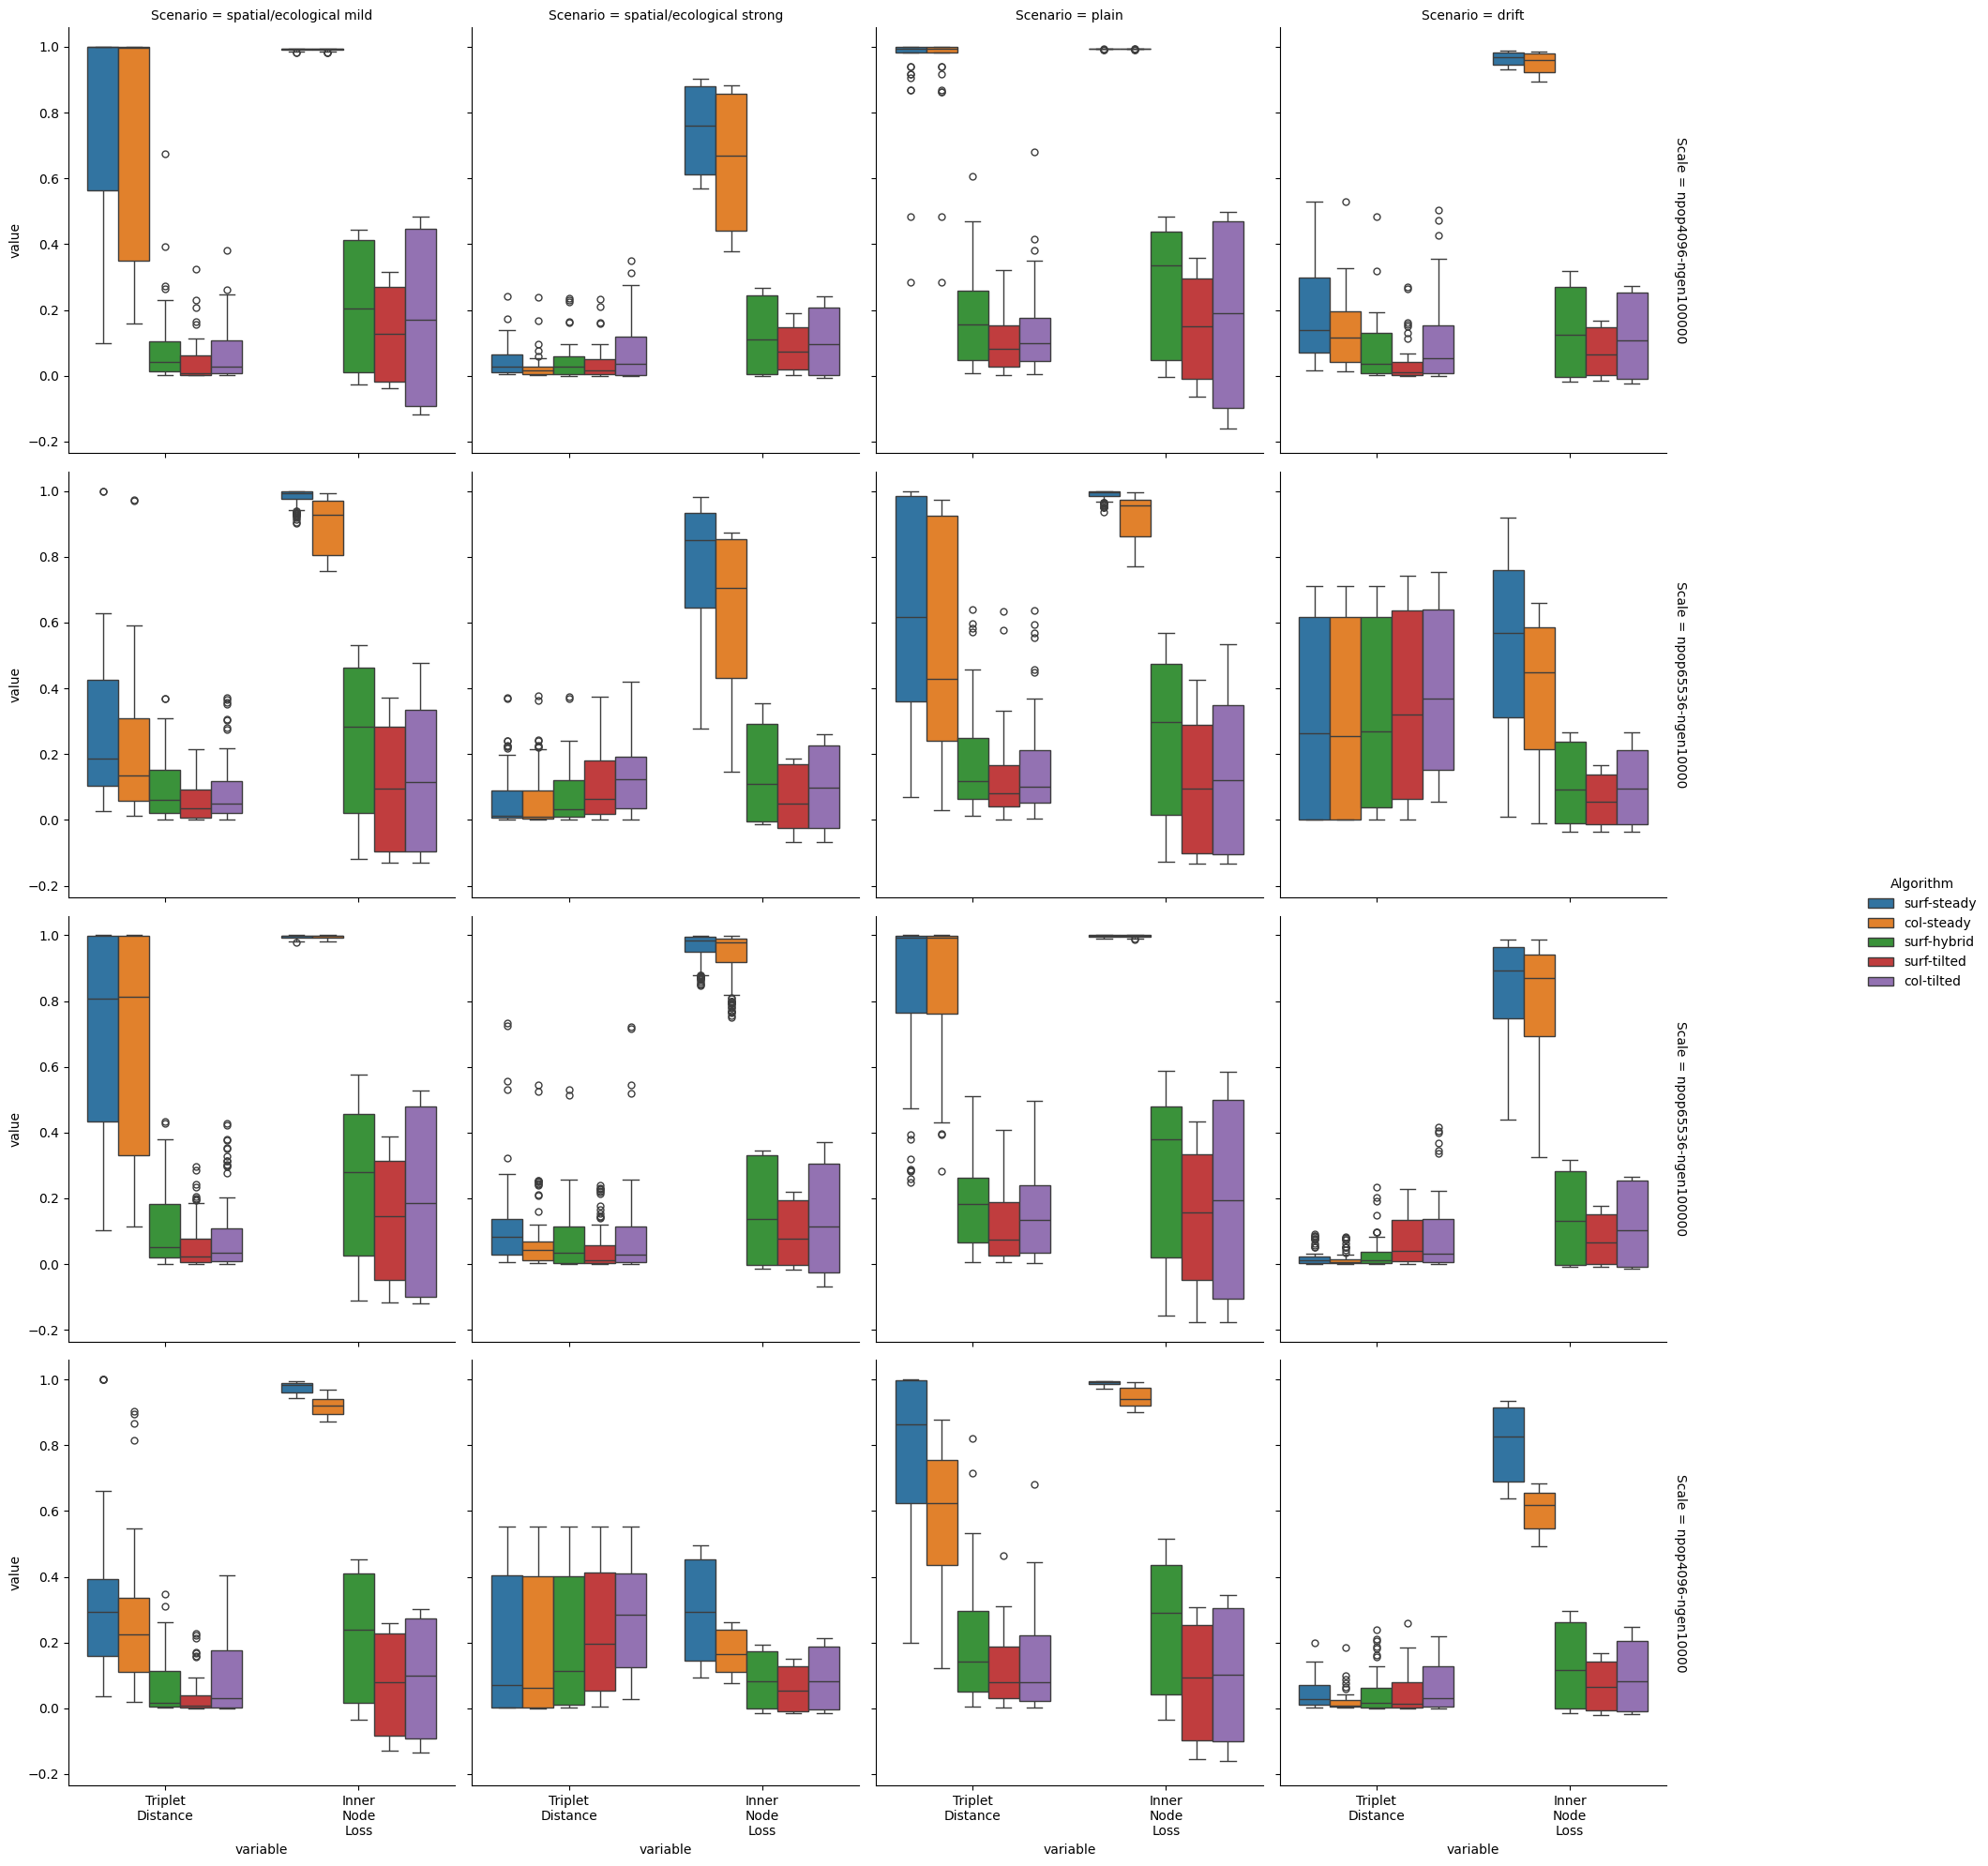

In [10]:
hue_order=[
    "surf-steady",
    "col-steady",
    "surf-hybrid",
    "surf-tilted",
    "col-tilted",
]


for sizebits, group in dfx.groupby("Annotation Size (bits)"):
    tp.tee(
        sns.catplot,
        kind="box",
        data=group,
        # score="value",
        x="variable",
        y="value",
        col="Scenario",
        row="Scale",
        hue="Algorithm",
        # x_group="outer",
        order=["Triplet\nDistance", "Inner\nNode\nLoss"],
        hue_order=hue_order,
        # skim_hatches=(".O", "*"),
        # skim_labels=("Worst", "Best"),
        margin_titles=True,
        # legend_width_inches=3,
        teeplot_outattrs={"a": "focal", "sizebits": sizebits},
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.84)",
    )


## Visualize All Metrics

teeplots/a=all+col=scenario+hue=algorithm+row=scale+sizebits=32+viz=catplot+x=variable+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+row=scale+sizebits=32+viz=catplot+x=variable+y=value+ext=.png


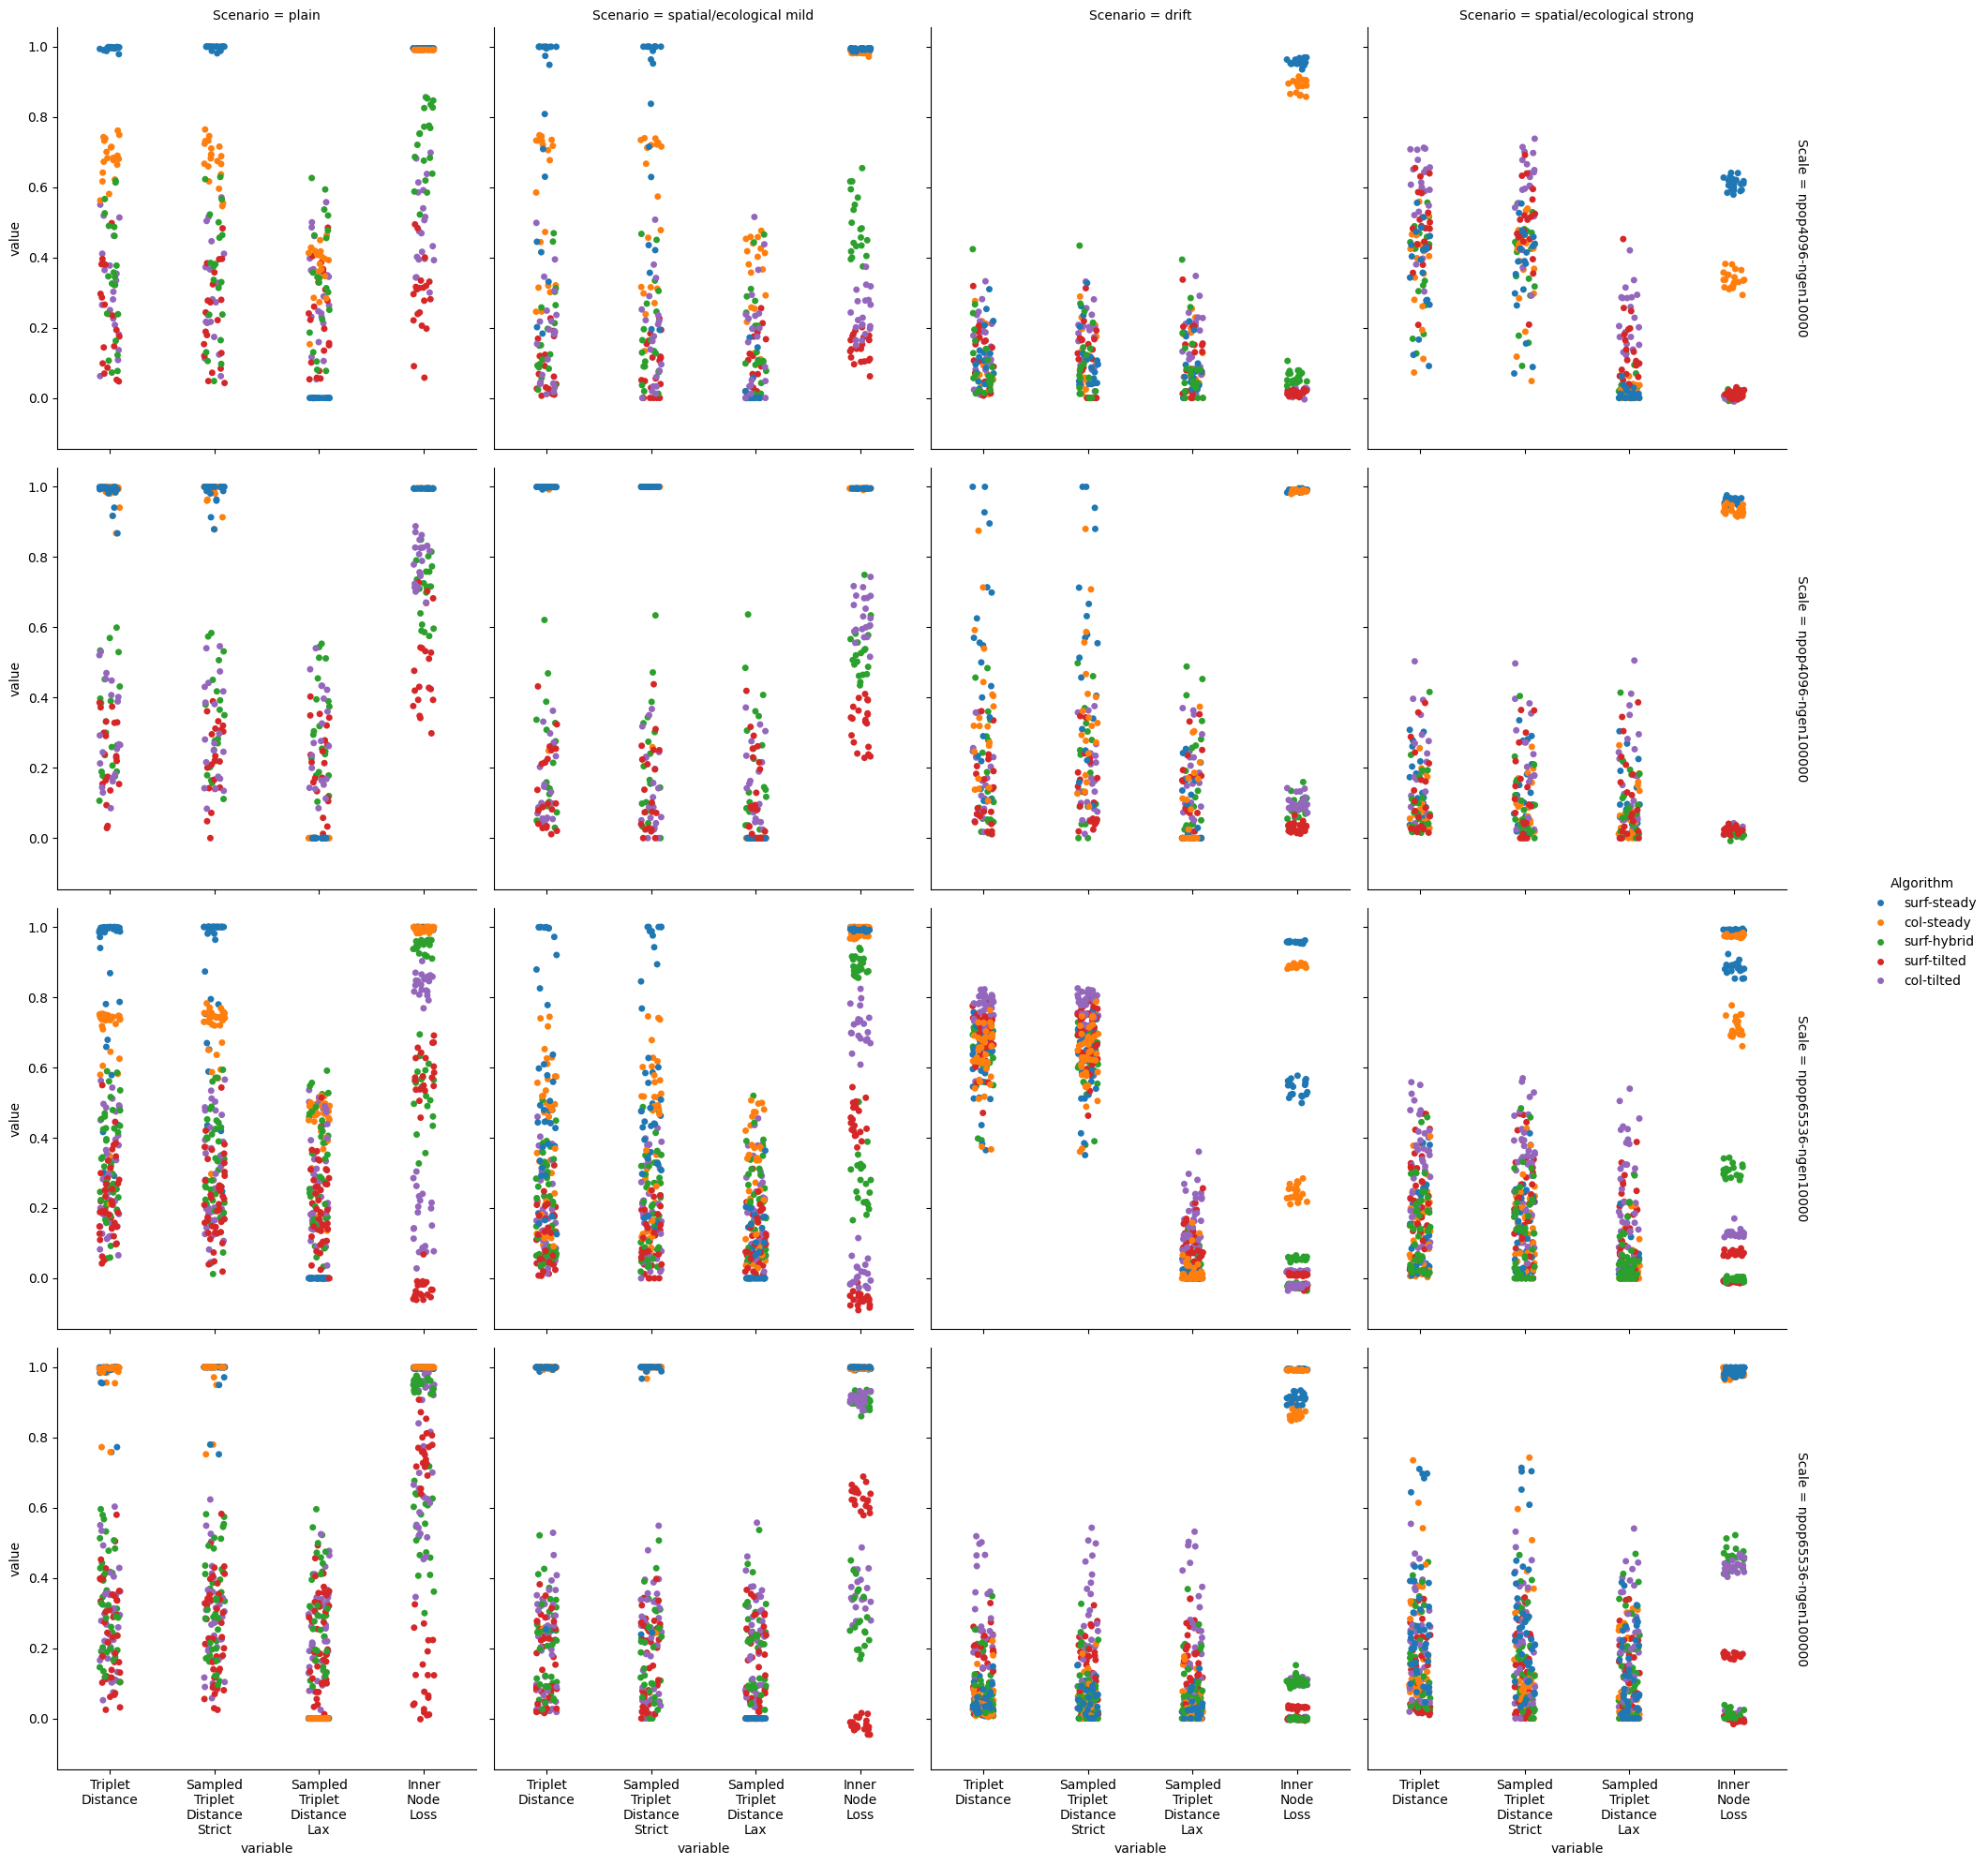

teeplots/a=all+col=scenario+hue=algorithm+row=scale+sizebits=64+viz=catplot+x=variable+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+row=scale+sizebits=64+viz=catplot+x=variable+y=value+ext=.png


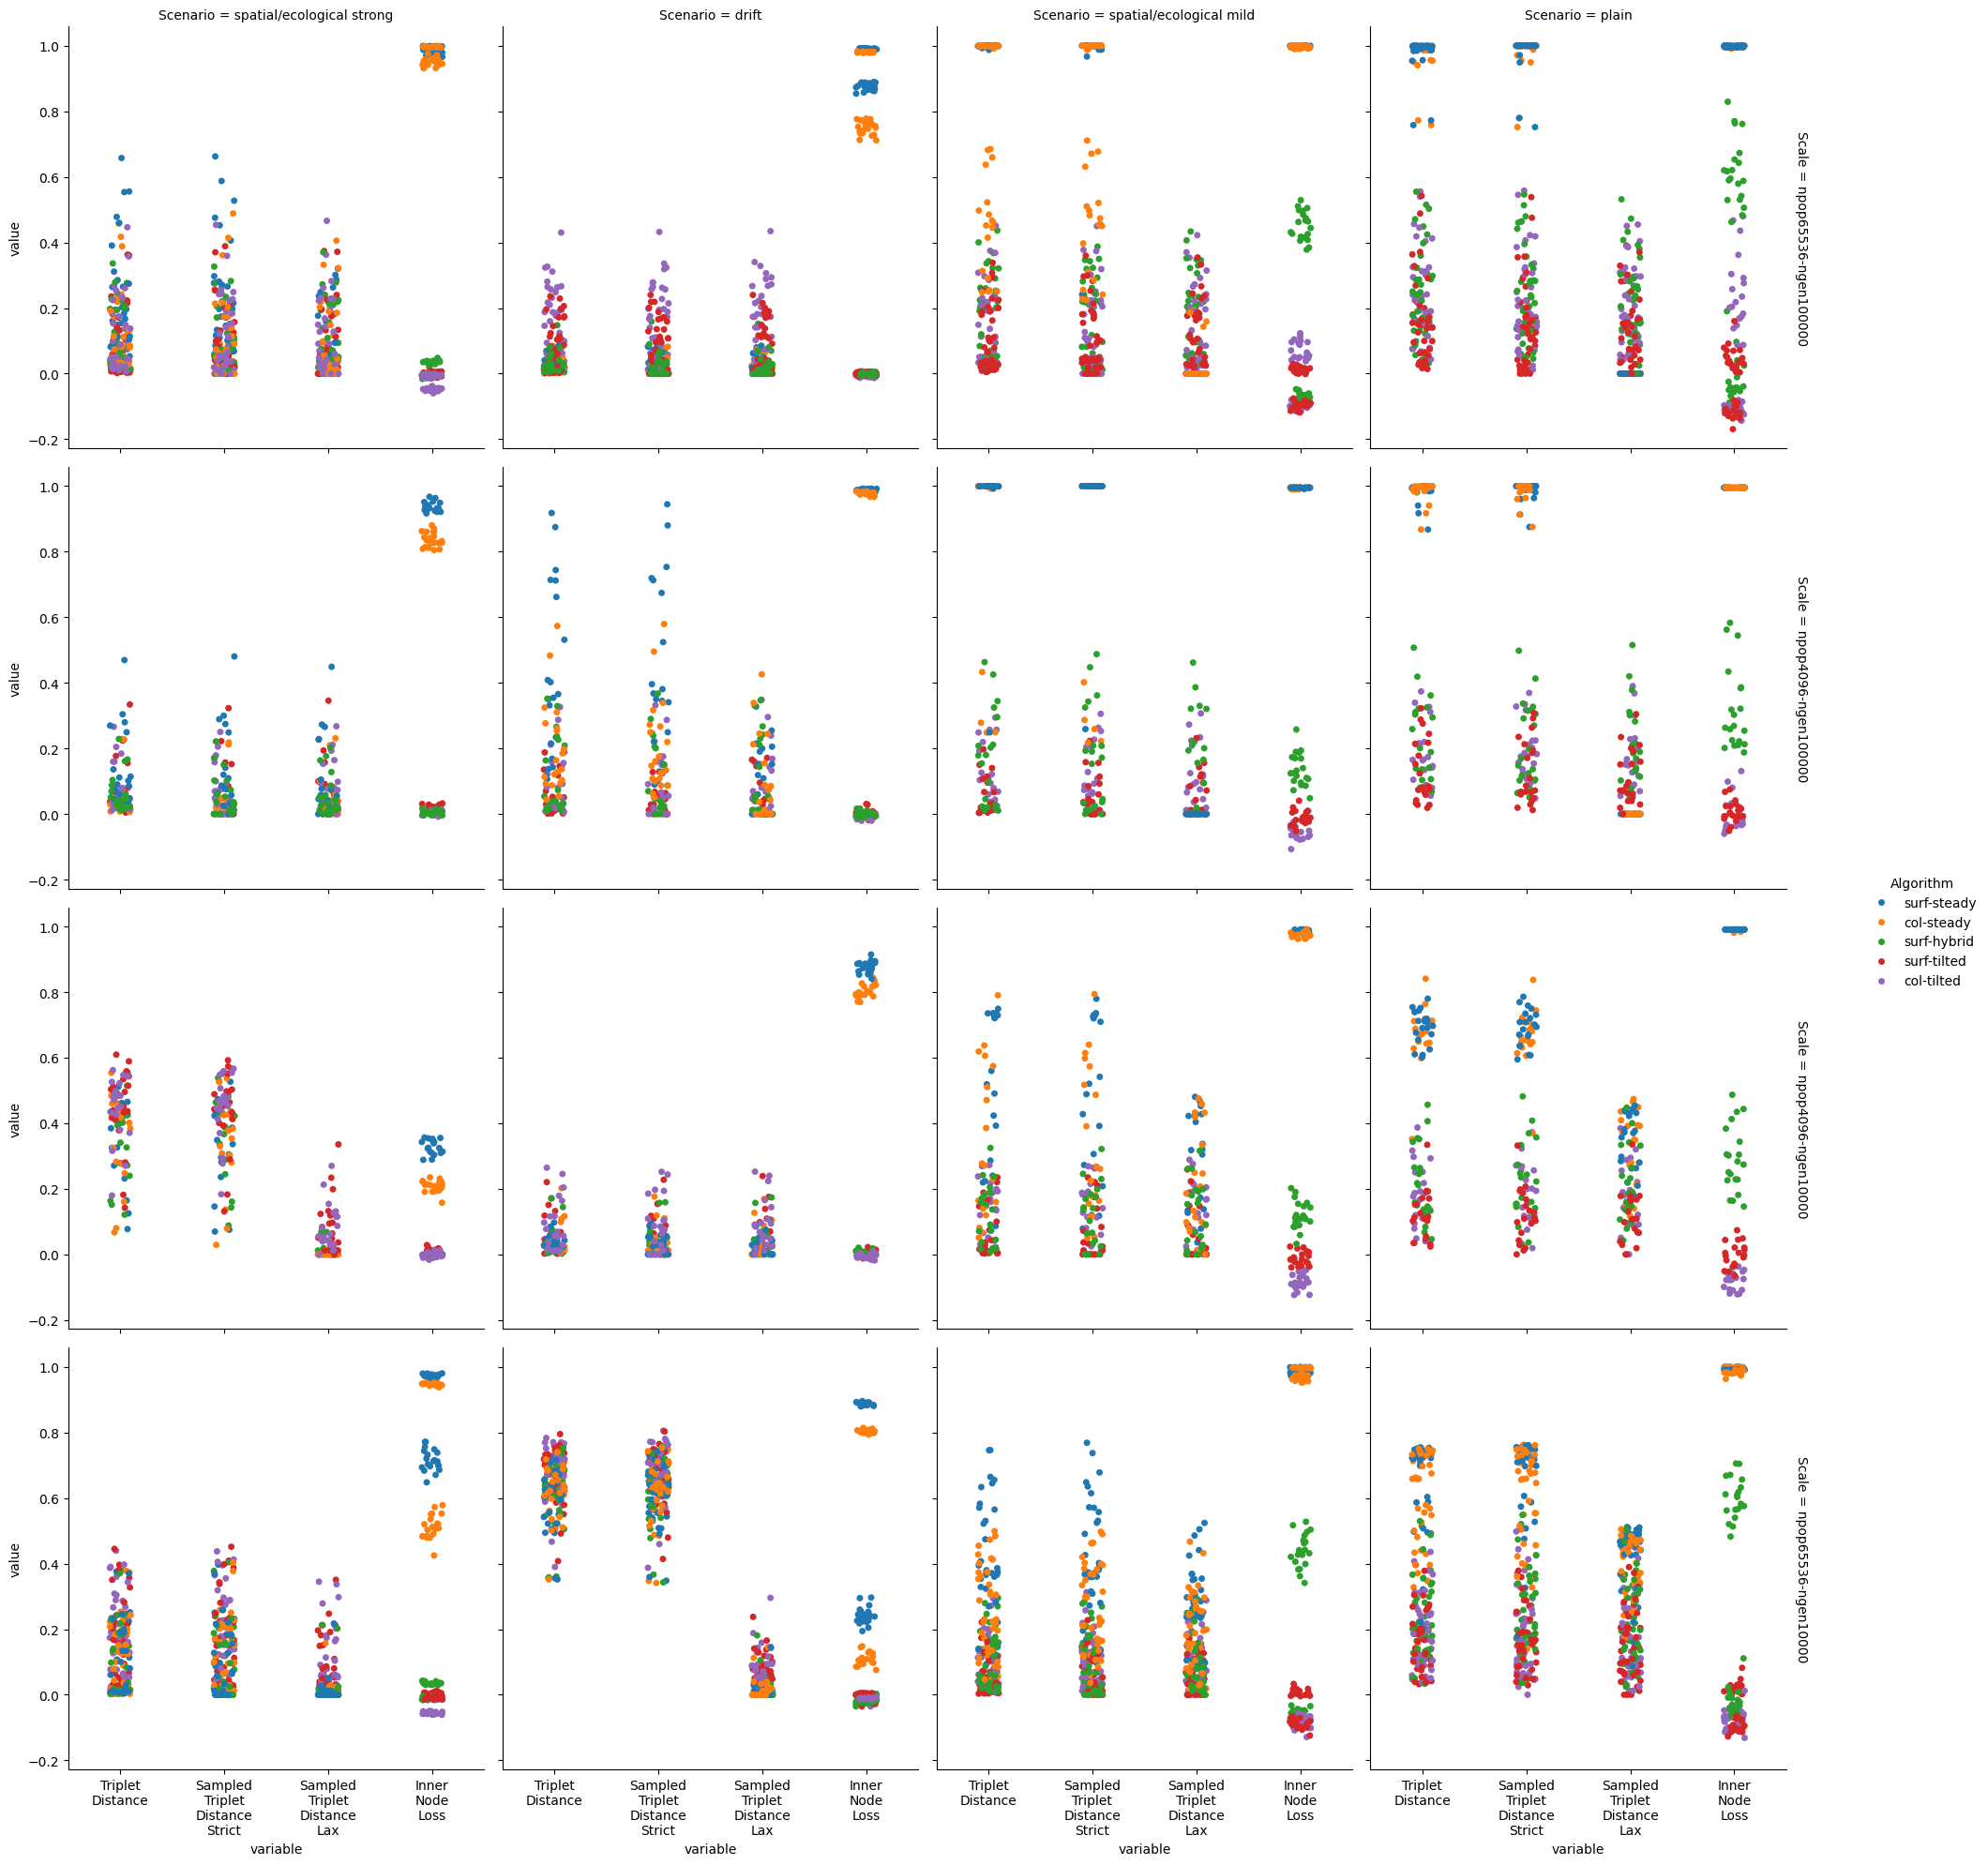

teeplots/a=all+col=scenario+hue=algorithm+row=scale+sizebits=256+viz=catplot+x=variable+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+row=scale+sizebits=256+viz=catplot+x=variable+y=value+ext=.png


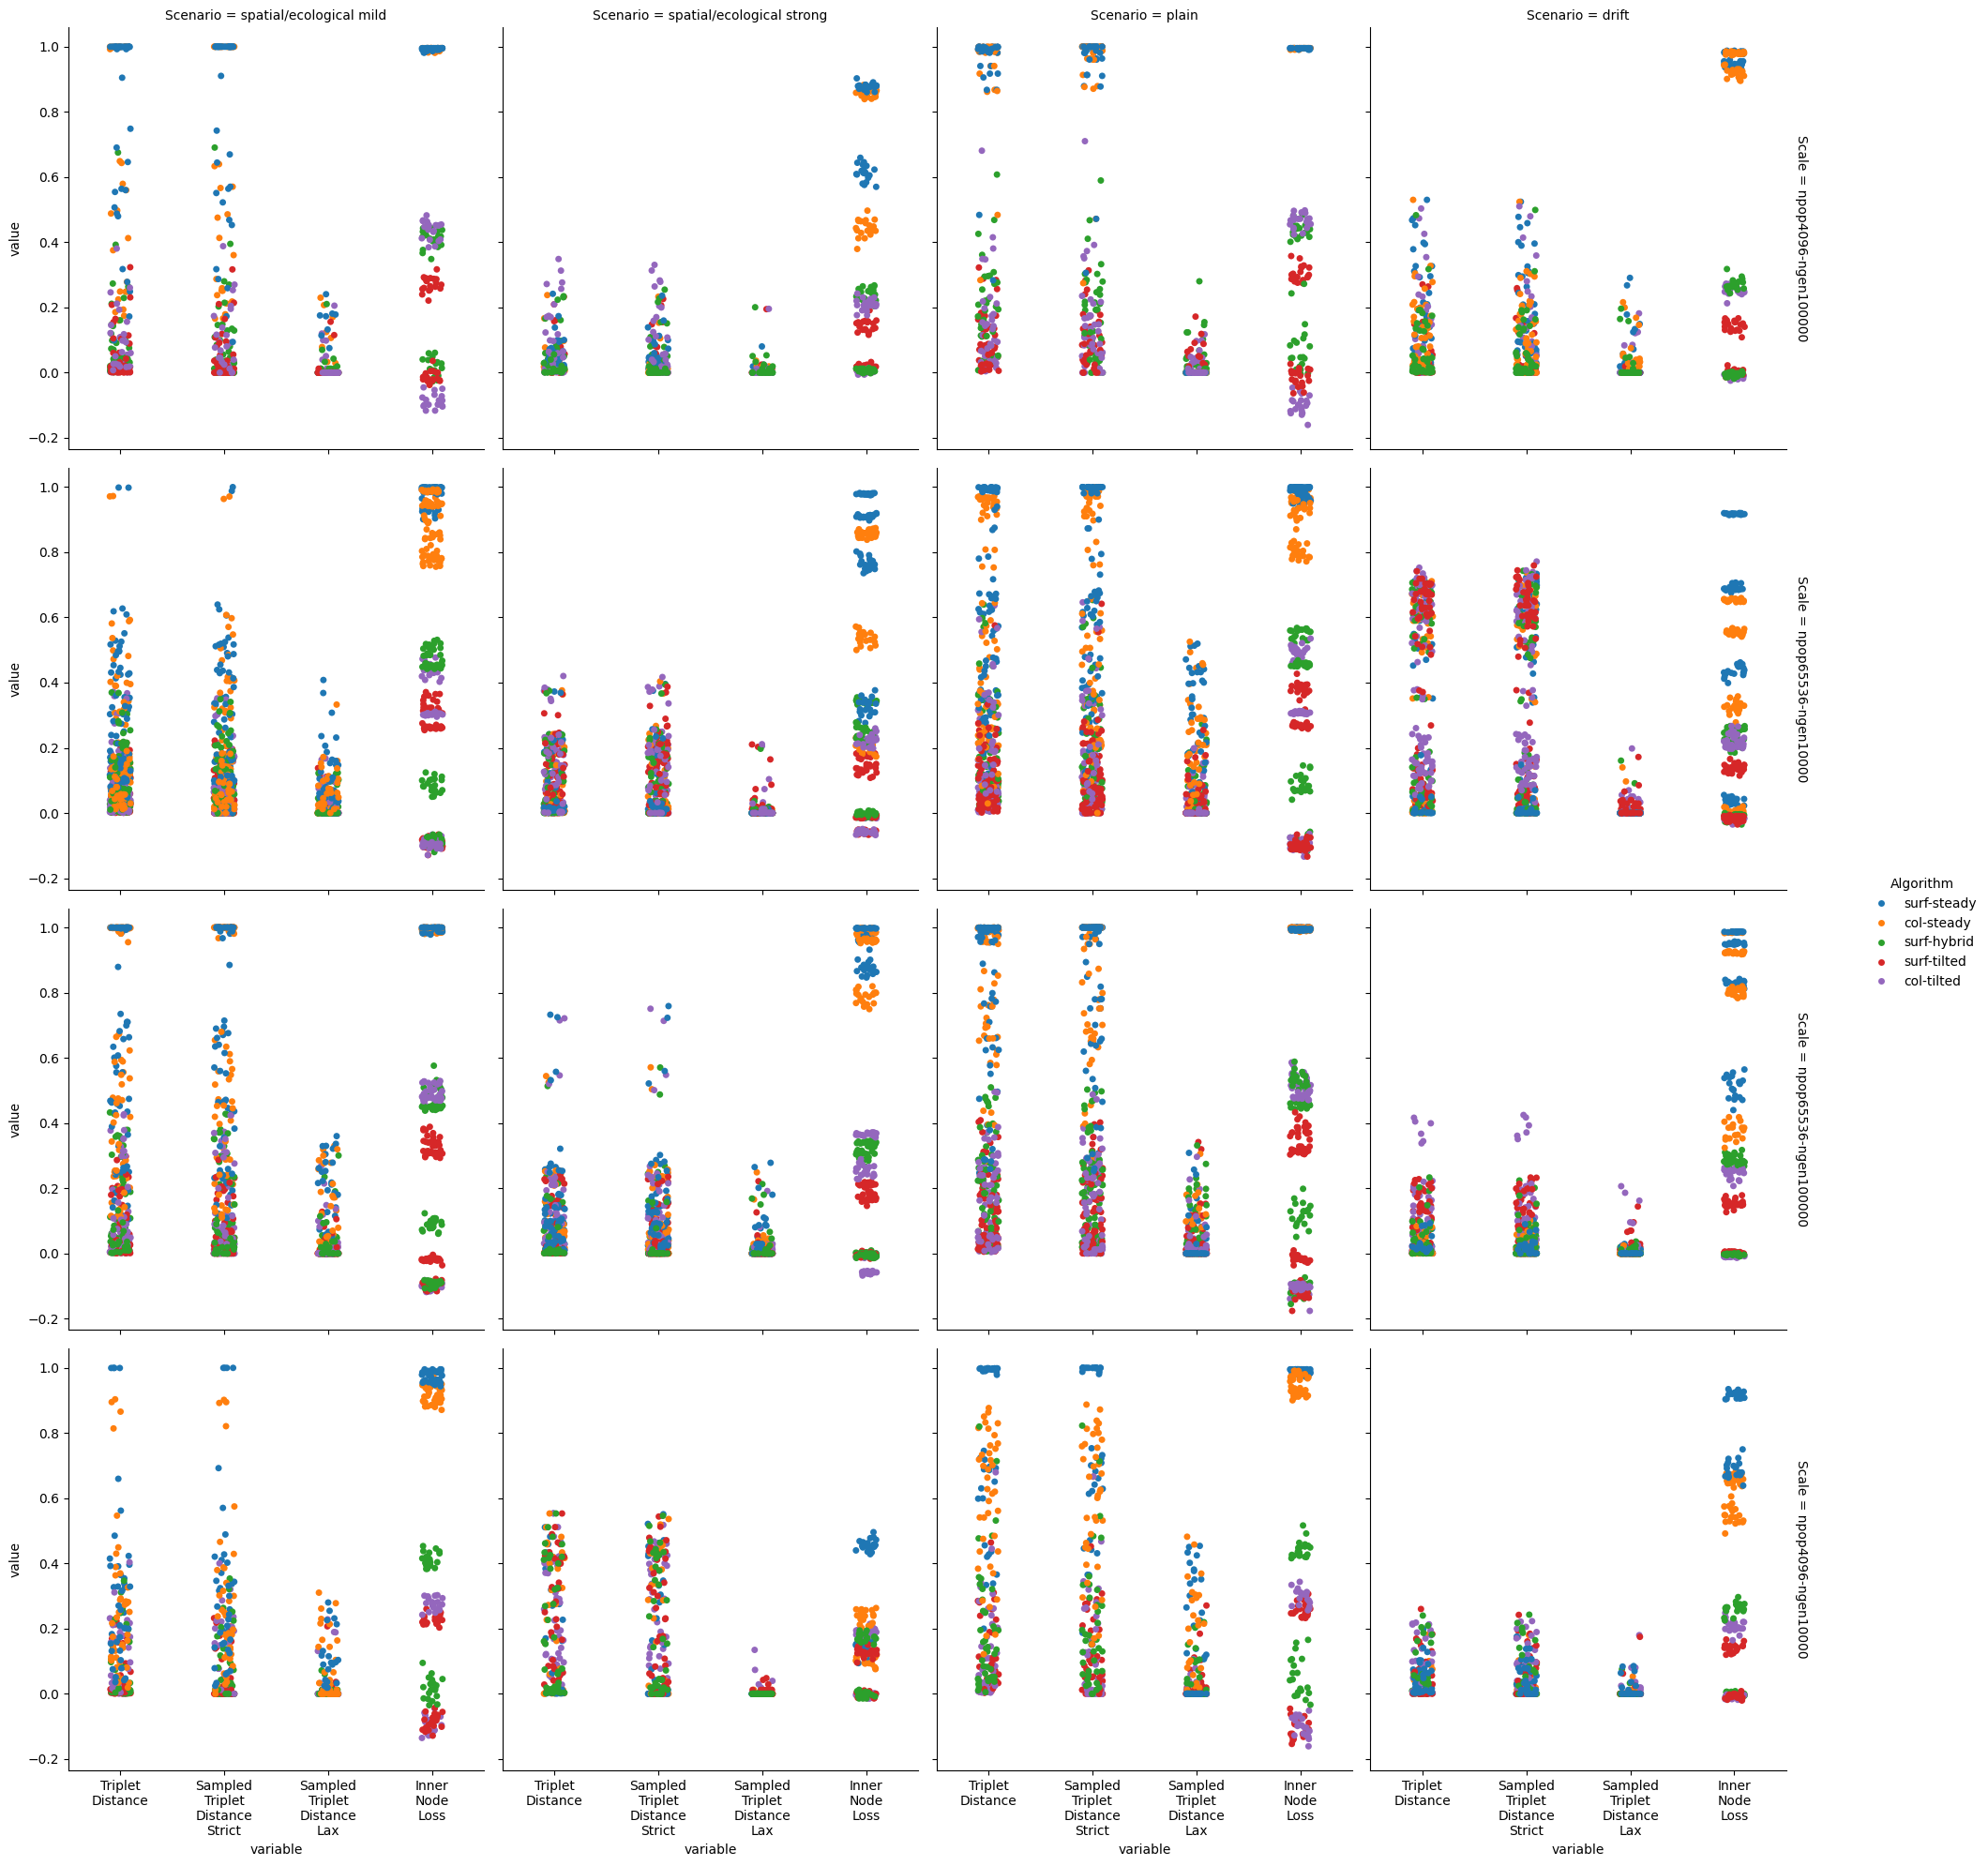

In [11]:
hue_order=[
    "surf-steady",
    "col-steady",
    "surf-hybrid",
    "surf-tilted",
    "col-tilted",
]


for sizebits, group in dfx.groupby("Annotation Size (bits)"):
    tp.tee(
        sns.catplot,
        data=group,
        # score="value",
        x="variable",
        y="value",
        col="Scenario",
        row="Scale",
        hue="Algorithm",
        # x_group="outer",
        hue_order=hue_order,
        # skim_hatches=(".O", "*"),
        # skim_labels=("Worst", "Best"),
        margin_titles=True,
        # legend_width_inches=3,
        teeplot_outattrs={"a": "all", "sizebits": sizebits},
        # teeplot_postprocess="teed.figure.subplots_adjust(right=0.84)",
    )


## Reproducibility Information

In [12]:
import datetime

datetime.datetime.now().isoformat()

'2024-03-20T14:22:00.285223'

In [13]:
%load_ext watermark
%watermark

Last updated: 2024-03-20T14:22:00.298617+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1016-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [14]:
!pip freeze

alifedata-phyloinformatics-convert==0.16.2
annotated-types==0.6.0
anytree==2.12.1
argcomplete==3.2.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.1
attrs==23.2.0
Automat==20.2.0
Babel==2.8.0
backstrip==0.2.4
bcrypt==3.2.0
beautifulsoup4==4.12.3
biopython==1.83
bitarray==2.9.2
bitstring==4.1.4
black==22.10.0
bleach==6.1.0
blinker==1.4
certifi==2024.2.2
cffi==1.16.0
chardet==4.0.0
charset-normalizer==3.3.2
click==8.1.7
cloud-init==23.4.4
colorama==0.4.4
comm==0.2.1
command-not-found==0.3
configobj==5.0.6
constantly==15.1.0
contourpy==1.2.0
cryptography==3.4.8
cycler==0.12.1
dataclasses==0.6
dbus-python==1.2.18
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
DendroPy==4.6.1
Deprecated==1.2.14
distro==1.7.0
distro-info==1.1+ubuntu0.2
distutils-strtobool==0.1.0
entrypoints==0.4
ete3==3.1.3
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.49.0
frozendict==2.4.0
gitdb==4.0.11
GitPython==3.1.42
hstrat==1.11.5
hsurf @ git+https://github.com/mmore50